## Weather Prediction With Ridge Regression ☀️☔️

### Background
Ridge regression is a valuable tool for weather prediction, especially when dealing with multiple correlated weather features. Traditional statistical methods like linear regression often struggle with multicollinearity, where predictor variables are highly correlated, leading to unreliable coefficient estimates and less robust models.

Ridge regression addresses this challenge by introducing a regularization term that penalizes large coefficient values. This helps to:
- **Reduce variance:** By shrinking coefficients, ridge regression reduces the model's sensitivity to small fluctuations in the data, leading to more stable predictions.
- **Handle multicollinearity:** When features are highly correlated, ridge regression prevents coefficients from becoming excessively large, improving model interpretability and generalizability.

### Implementation Details
Ridge regression builds a linear relationship between the predicted weather variable (e.g., temperature) and several predictor variables (e.g., pressure, humidity, wind speed). Unlike standard linear regression, it adds a penalty term to the cost function that discourages excessively large coefficients.

#### Basic Idea:
**Standard Linear Regression Cost Function:**
Minimize `(predicted value - actual value)^2` (summed over all data points)

**Ridge Regression Cost Function:**
Minimize `(predicted value - actual value)^2 (summed over all data points) + λ * sum of squared coefficients`

λ (lambda) is a hyperparameter that controls the strength of the penalty on large coefficients. Higher λ values lead to greater shrinkage.

### Data Exploration and Preparation
We'll gather weather data from reliable sources for a specific period. The data preparation will involve:
- **Cleaning and formatting:** Handling missing values, ensuring consistent data types, and potentially encoding categorical variables numerically.
- **Feature selection:** Identifying the most relevant weather features (predictors) that might influence the target variable (e.g., temperature). Techniques like correlation analysis can be used for this purpose.
- **Splitting the data:** Separating the data into training and testing sets for model evaluation.

### Training the Ridge Regression Model
We'll use a machine learning library like scikit-learn in Python to train the ridge regression model. The process involves:
- **Defining the model:** Specifying the hyperparameter λ (using techniques like cross-validation to find the optimal value).
- **Fitting the model:** Training the model on the prepared training data.
- **Evaluating the model:** Assessing the model's performance on the testing data using metrics like mean squared error (MSE) or R-squared.

By implementing ridge regression, we can leverage its strengths to build a robust and informative model for weather prediction, considering the potential correlations between various weather features.


In [110]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")

In [111]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1975-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.03,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",20.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.03,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",70.0,30.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.0,40.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.74,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.54,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.51,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formatting the Data

### 1.Calculating Percentage of Null Values:
The first section calculates the percentage of null values in each column of the 'weather' DataFrame using the apply function along with `pd.isnull` to create a boolean mask of null values, then summing them up column-wise and dividing by the total number of rows in the DataFrame.The result is stored in the variable `null_pct`, which contains the percentage of null values for each column.

In [112]:
# Calculate the percentage of null values in each column of the 'weather' DataFrame
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]

# Display the percentage of null values for each column
null_pct


STATION    0.000000
NAME       0.000000
ACMH       0.567638
ACSH       0.567583
AWND       0.182626
FMTM       0.438024
PGTM       0.318956
PRCP       0.000056
SNOW       0.000056
SNWD       0.000167
TAVG       0.627089
TMAX       0.000056
TMIN       0.000056
TSUN       0.998279
WDF1       0.567860
WDF2       0.432528
WDF5       0.437136
WDFG       0.715737
WDFM       0.999944
WESD       0.663392
WSF1       0.567694
WSF2       0.432528
WSF5       0.437191
WSFG       0.585734
WSFM       0.999944
WT01       0.622648
WT02       0.937274
WT03       0.931668
WT04       0.983014
WT05       0.979795
WT06       0.991563
WT07       0.994005
WT08       0.833306
WT09       0.993061
WT11       0.999223
WT13       0.878712
WT14       0.950763
WT15       0.997669
WT16       0.677769
WT17       0.996669
WT18       0.942159
WT19       0.999944
WT21       0.999722
WT22       0.997280
WV01       0.999944
dtype: float64

### 2.Filtering Valid Columns:
It then filters out columns where the percentage of null values is less than 5% (0.05) using boolean indexing with the condition `null_pct < 0.05`.
The resulting columns are stored in the variable `valid_columns`.

In [113]:
# Select columns with less than 5% missing values
valid_columns = weather.columns[null_pct < .05]

In [114]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

### 3.Updating DataFrame:
Next, the code updates the 'weather' DataFrame by keeping only the columns identified as valid in the previous step. This is done by using the copy() method to create a copy of the DataFrame with only the valid columns.
It also converts the column names to lowercase using the `str.lower()`` method.

In [115]:
weather = weather[valid_columns].copy()

In [116]:
# Convert column names to lowercase
weather.columns = weather.columns.str.lower()

In [117]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1975-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,45.0,34.0
1975-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40.0,31.0
1975-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,41.0,26.0
1975-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,38.0
1975-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,44.0,30.0
...,...,...,...,...,...,...,...
2024-04-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,57.0,41.0
2024-04-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,68.0,49.0
2024-04-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,53.0,42.0


In [118]:
# Fill missing values using forward fill 
weather = weather.ffill()

In [119]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [120]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [121]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [122]:
weather.index

Index(['1975-01-01', '1975-01-02', '1975-01-03', '1975-01-04', '1975-01-05',
       '1975-01-06', '1975-01-07', '1975-01-08', '1975-01-09', '1975-01-10',
       ...
       '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22',
       '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27'],
      dtype='object', name='DATE', length=18015)

In [123]:
# Convert index to datetime format
weather.index = pd.to_datetime(weather.index)

In [124]:
# Display counts of data by year
weather.index.year.value_counts().sort_index()

DATE
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    118
Name: count, dtype: int64

<Axes: xlabel='DATE'>

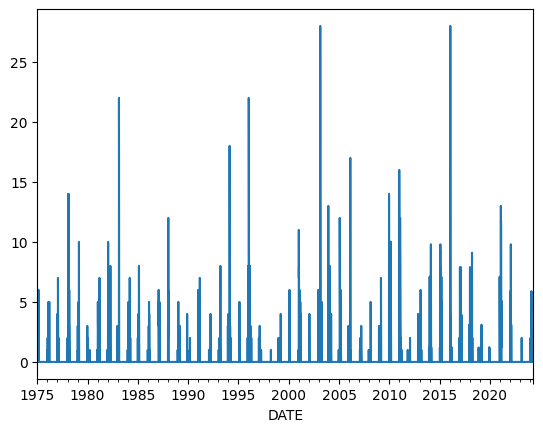

In [125]:
weather["snwd"].plot()

In [126]:

# Create a target column for predicting maximum temperature
weather["target"] = weather.shift(-1)["tmax"]

In [127]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1975-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,45.0,34.0,40.0
1975-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40.0,31.0,41.0
1975-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,41.0,26.0,49.0
1975-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,38.0,44.0
1975-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,44.0,30.0,43.0
...,...,...,...,...,...,...,...,...
2024-04-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,57.0,41.0,68.0
2024-04-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,68.0,49.0,53.0
2024-04-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,53.0,42.0,55.0


In [128]:
weather = weather.ffill()

In [129]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1975-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,45.0,34.0,40.0
1975-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40.0,31.0,41.0
1975-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.03,0.0,0.0,41.0,26.0,49.0
1975-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,38.0,44.0
1975-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,44.0,30.0,43.0
...,...,...,...,...,...,...,...,...
2024-04-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,57.0,41.0,68.0
2024-04-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,68.0,49.0,53.0
2024-04-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,53.0,42.0,55.0


In [130]:
from sklearn.linear_model import Ridge
# Initialize Ridge regression model
rr = Ridge(alpha=.1)

In [131]:
# Select predictors for the model
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [132]:
# Define function to backtest the model
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        # Fit the model on training data
        model.fit(train[predictors], train["target"])
        # Make predictions on test data
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        # Combine actual and predicted values
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]

        # Calculate the absolute difference between actual and predicted values
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [133]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1984-12-29,64.0,64.825187,0.825187
1984-12-30,48.0,55.268166,7.268166
1984-12-31,52.0,46.116251,5.883749
1985-01-01,57.0,53.765126,3.234874
1985-01-02,37.0,53.653692,16.653692
...,...,...,...
2024-04-23,68.0,56.457435,11.542565
2024-04-24,53.0,65.493833,12.493833
2024-04-25,55.0,55.164030,0.164030


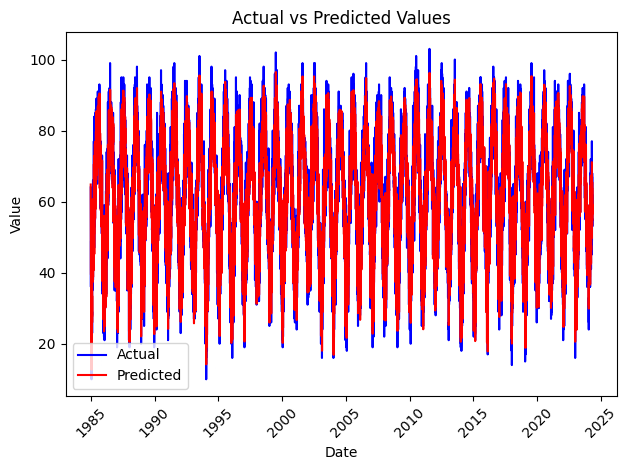

In [134]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(predictions.index, predictions['actual'], label='Actual', color='blue')

# Plot predicted values
plt.plot(predictions.index, predictions['prediction'], label='Predicted', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.156254112499903

In [136]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.758547,28.241453
1999-01-02,53.0,25.970550,27.029450
1985-04-18,84.0,56.978191,27.021809
1998-03-26,80.0,53.051624,26.948376
1990-03-12,85.0,58.101373,26.898627
...,...,...,...
1992-02-03,41.0,40.996791,0.003209
2018-11-22,32.0,31.997090,0.002910
2014-07-27,84.0,83.998657,0.001343


In [137]:
pd.Series(rr.coef_, index=predictors)

prcp   -1.114438
snow   -0.420409
snwd    0.049889
tmax    0.451301
tmin    0.511798
dtype: float64

In [138]:
# percentage difference
def pct_diff(old, new):
    return (new - old) / old

# function to compute rolling averages and percentage differences
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
# Iterate over each rolling horizon value and each weather attribute
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [139]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    # Calculate the expanding mean for each month and create a new column
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [140]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [141]:

predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

## predictors = weather.columns[~weather.columns.isin(["target"])]

##predictors = weather.columns[~weather.columns.isin(["target", "name", "station", "prcp"])]


In [142]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.809052847845012

In [143]:
mean_squared_error(predictions["actual"], predictions["prediction"])

37.93061786413445

In [144]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.559333,30.440667
1998-03-26,80.0,52.098328,27.901672
2007-03-26,78.0,50.112810,27.887190
2003-04-15,86.0,59.389957,26.610043
1985-04-18,84.0,58.108155,25.891845
...,...,...,...
2002-11-28,42.0,41.995935,0.004065
2011-11-08,63.0,62.996167,0.003833
1999-06-01,80.0,80.002613,0.002613


In [145]:
weather_2023 = weather.loc["2023-01-01":"2023-12-31"]

<Axes: xlabel='diff'>

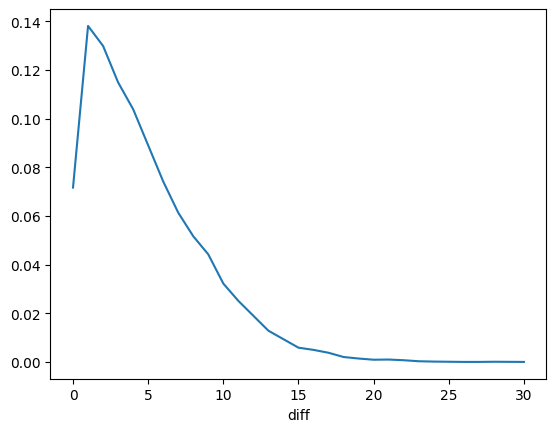

In [146]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [147]:
predictions

,actual,prediction,diff
DATE,,,
1985-01-12,36.0,36.032606,0.032606
1985-01-13,43.0,39.347931,3.652069
1985-01-14,39.0,40.897368,1.897368
1985-01-15,27.0,33.207500,6.207500
1985-01-16,32.0,27.773551,4.226449
...,...,...,...
2024-04-23,68.0,59.628431,8.371569
2024-04-24,53.0,65.656624,12.656624
2024-04-25,55.0,58.544538,3.544538


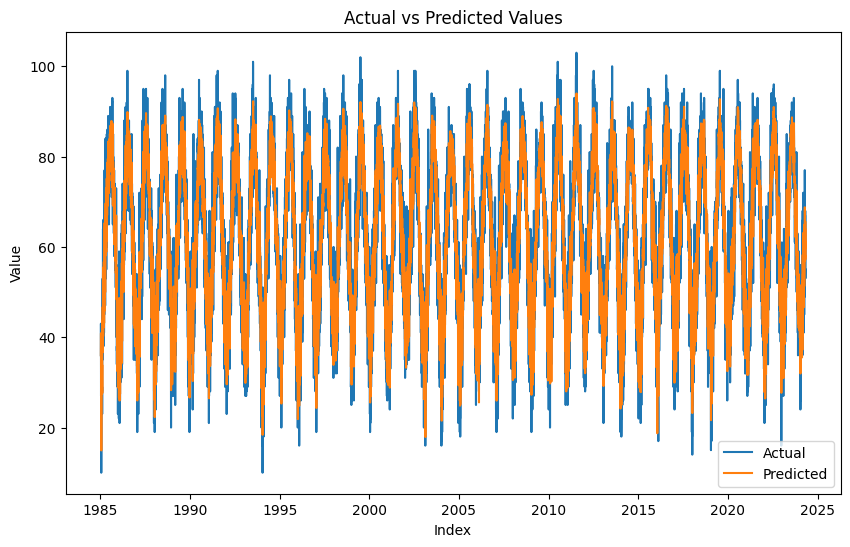

In [148]:
import matplotlib.pyplot as plt

# Assuming predictions is a dictionary containing actual and predicted values
actual_values = predictions["actual"]
predicted_values = predictions["prediction"]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


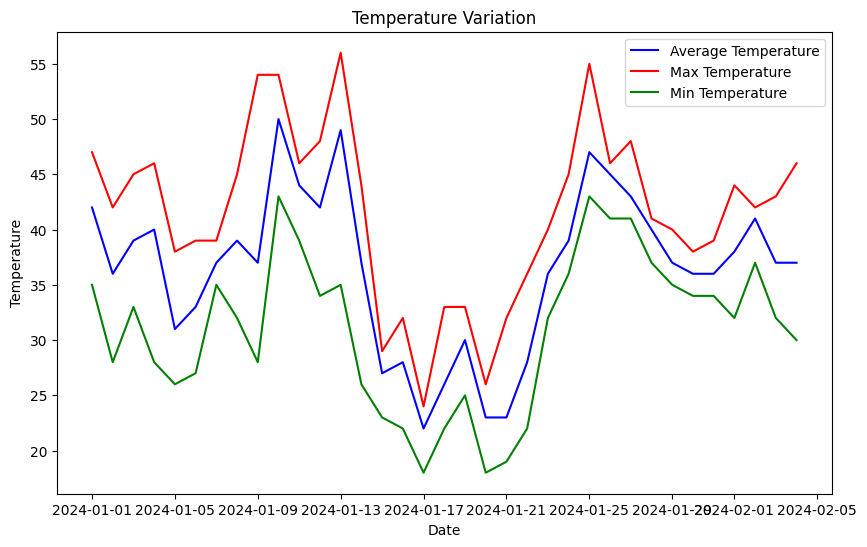

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the CSV file into a DataFrame
data = pd.read_csv('weather.csv')  # Update 'weather.csv' with your CSV file name

# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Get user input for start and end dates
start_date_input = input("Enter the start date in YYYY-MM-DD format: ")
end_date_input = input("Enter the end date in YYYY-MM-DD format: ")

# Convert user input strings to datetime format
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)

# Filter the data based on the specified date range
filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]

# Extract relevant columns for plotting
dates = filtered_data['DATE']
tavg_values = filtered_data['TAVG']
tmax_values = filtered_data['TMAX']
tmin_values = filtered_data['TMIN']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, tavg_values, color='blue', label='Average Temperature')
plt.plot(dates, tmax_values, color='red', label='Max Temperature')
plt.plot(dates, tmin_values, color='green', label='Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.legend()
plt.show()


## Data Visualization

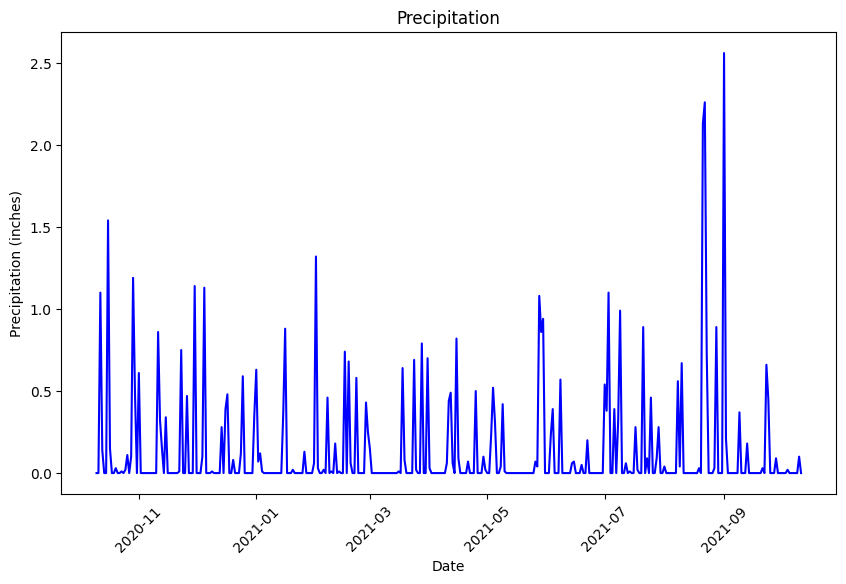

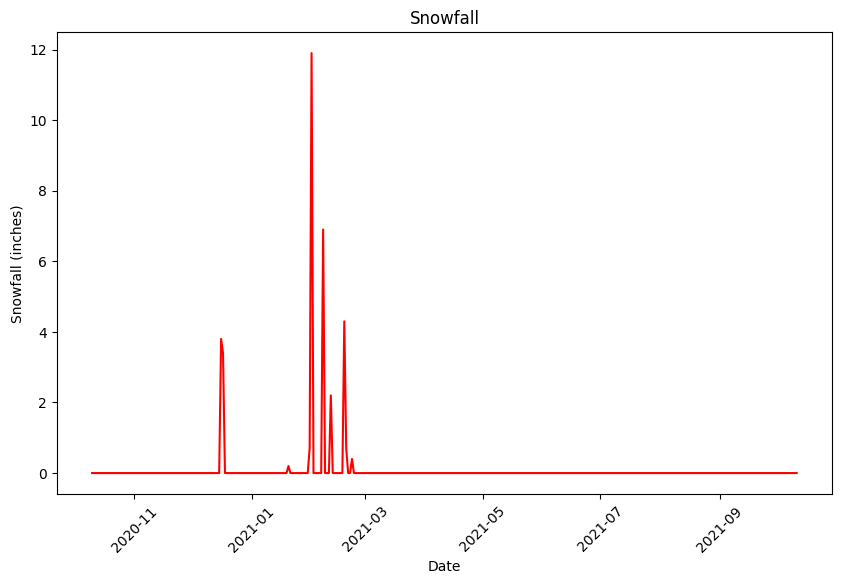

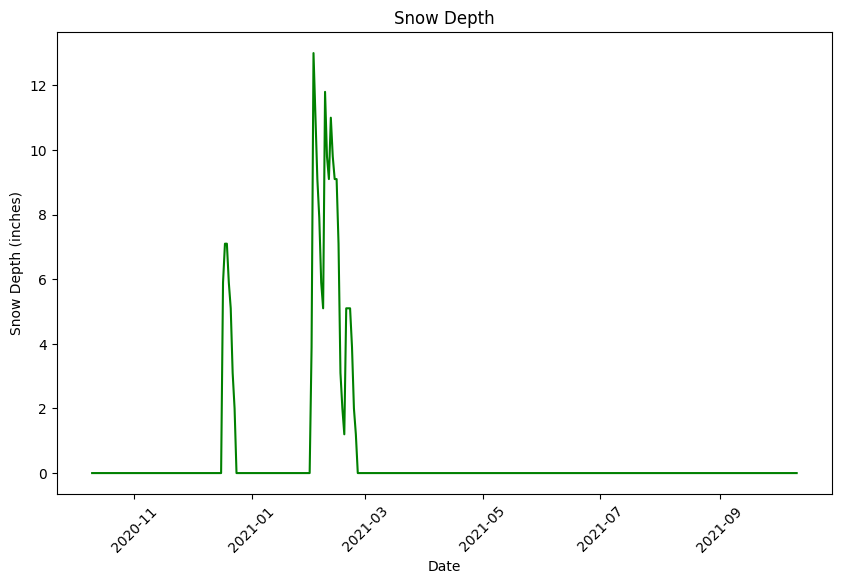

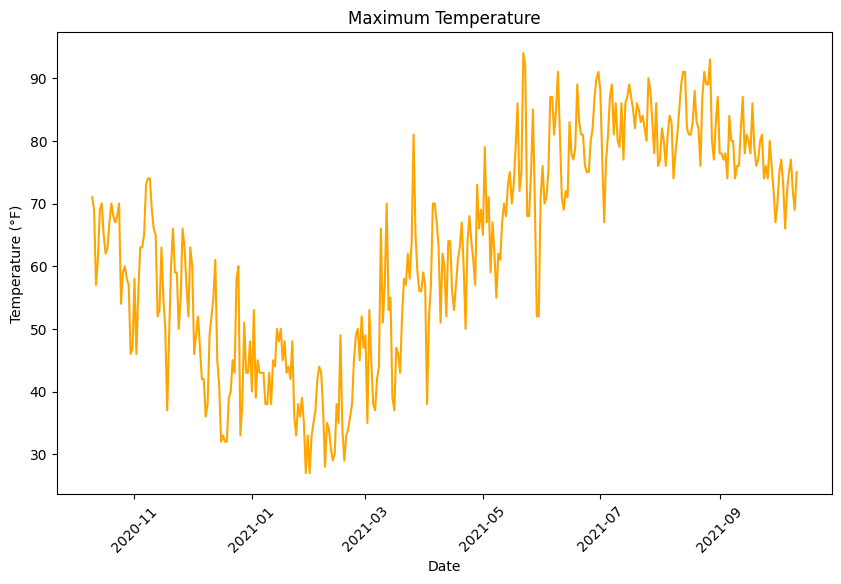

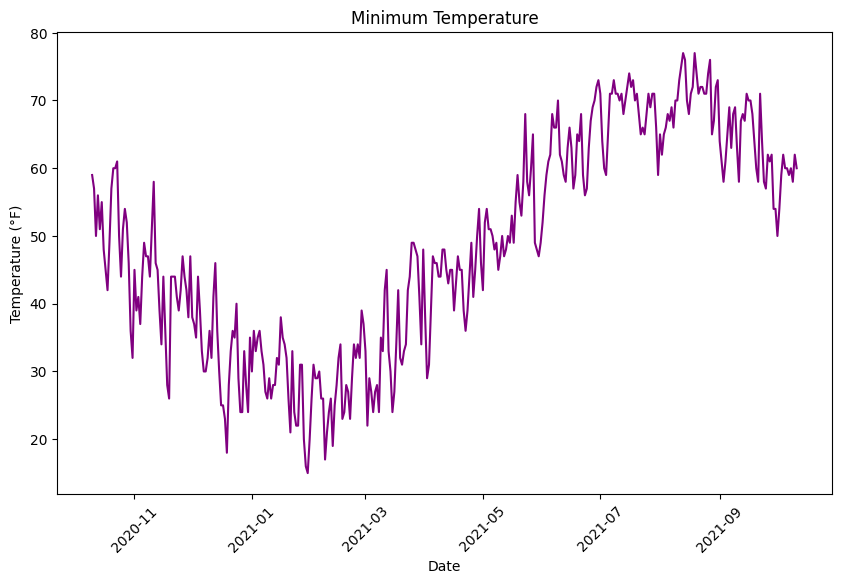

In [150]:
weather_data = pd.read_csv("weather.csv")
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

def visualize_weather_data(data):
    start_date_input = input("Enter the start date in YYYY-MM-DD format: ")
    end_date_input = input("Enter the end date in YYYY-MM-DD format: ")

    start_date = pd.to_datetime(start_date_input)
    end_date = pd.to_datetime(end_date_input)

    filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]

    # Plot precipitation
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['DATE'], filtered_data['PRCP'], color='blue')
    plt.title('Precipitation')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (inches)')
    plt.xticks(rotation=45)
    plt.show()

    # Plot snowfall
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['DATE'], filtered_data['SNOW'], color='red')
    plt.title('Snowfall')
    plt.xlabel('Date')
    plt.ylabel('Snowfall (inches)')
    plt.xticks(rotation=45)
    plt.show()

    # Plot snow depth
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['DATE'], filtered_data['SNWD'], color='green')
    plt.title('Snow Depth')
    plt.xlabel('Date')
    plt.ylabel('Snow Depth (inches)')
    plt.xticks(rotation=45)
    plt.show()

    # Plot maximum temperature
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['DATE'], filtered_data['TMAX'], color='orange')
    plt.title('Maximum Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°F)')
    plt.xticks(rotation=45)
    plt.show()

    # Plot minimum temperature
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['DATE'], filtered_data['TMIN'], color='purple')
    plt.title('Minimum Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°F)')
    plt.xticks(rotation=45)
    plt.show()

visualize_weather_data(weather_data)


## Heatmap

1. **Precipitation Heatmap**:
   - This heatmap visualizes the precipitation data using shades of blue.
   - The color intensity represents the amount of precipitation (in inches) on a particular day.
   - The x-axis represents the date, and the y-axis represents the day.
   - Higher intensity of blue indicates higher precipitation.


2. **Snowfall Heatmap**:
   - Similar to the precipitation heatmap, this heatmap visualizes the snowfall data.
   - It uses shades of blue to represent the amount of snowfall (in inches) on each day.
   - The x-axis represents the date, and the y-axis represents the day.
   - Higher intensity of blue indicates higher snowfall.


3. **Snow Depth Heatmap**:
   - This heatmap represents the depth of snow using shades of blue.
   - It visualizes the accumulation of snow over time.
   - The x-axis represents the date, and the y-axis represents the day.
   - Higher intensity of blue indicates a greater depth of snow.


4. **Maximum Temperature Heatmap**:
   - This heatmap visualizes the maximum temperature using shades of red.
   - It represents the highest temperature (in °F) recorded on each day.
   - The x-axis represents the date, and the y-axis represents the day.
   - Higher intensity of red indicates higher temperatures.


5. **Minimum Temperature Heatmap**:
   - Similar to the maximum temperature heatmap, this heatmap represents the minimum temperature.
   - It uses shades of blue to represent the lowest temperature (in °F) recorded on each day.
   - The x-axis represents the date, and the y-axis represents the day.
   - Higher intensity of blue indicates lower temperatures.

The expected output images for each heatmap would be displayed based on the provided data, showcasing visual representations of various weather parameters over time.


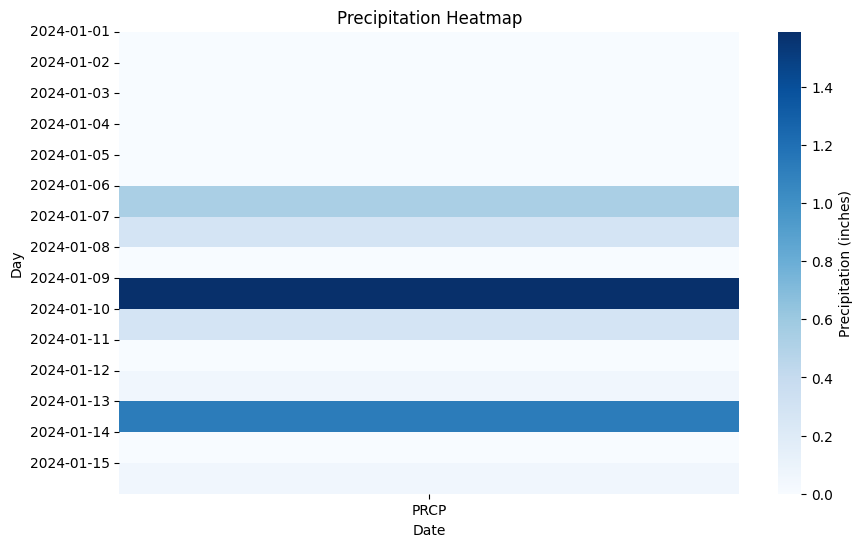

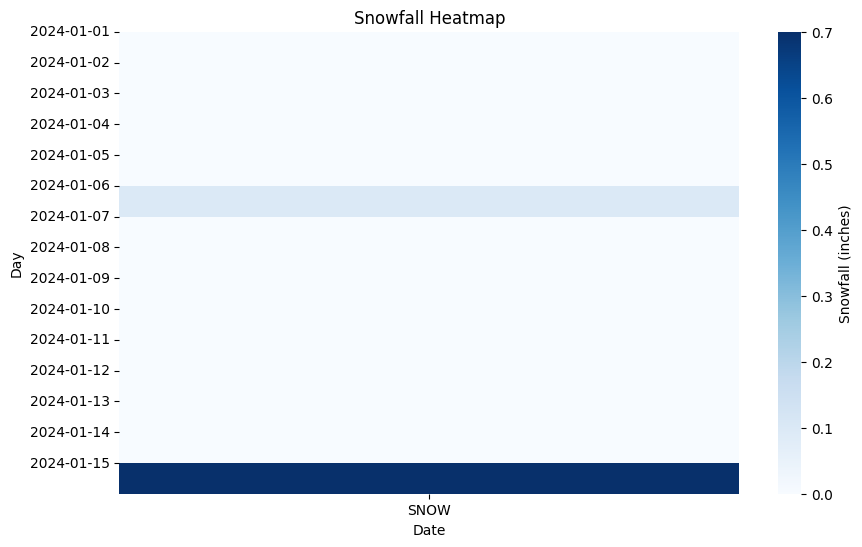

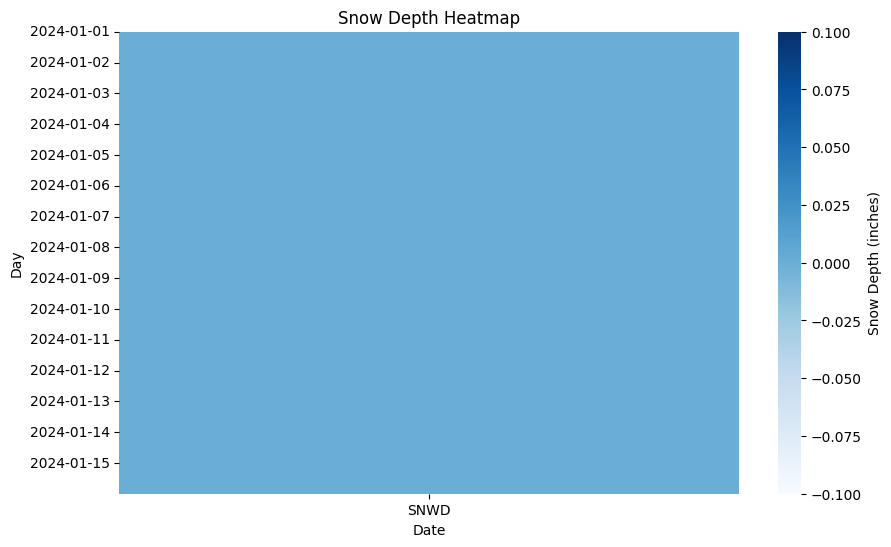

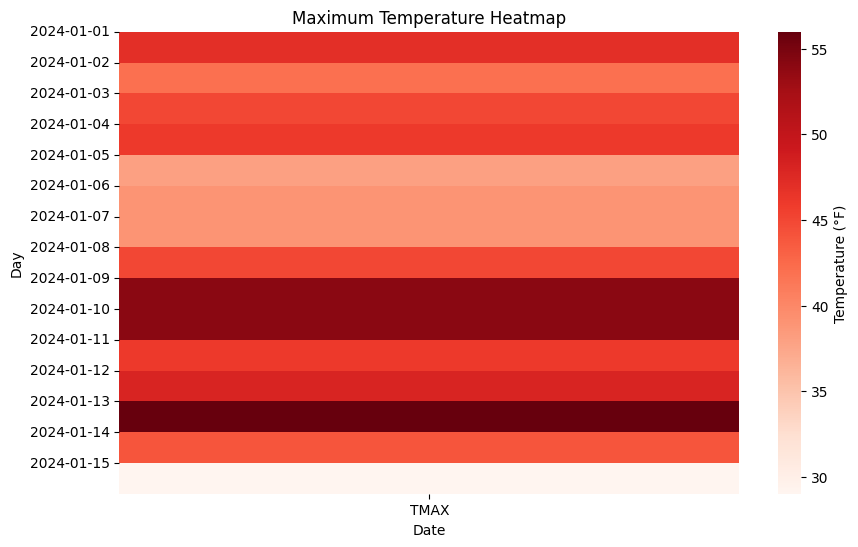

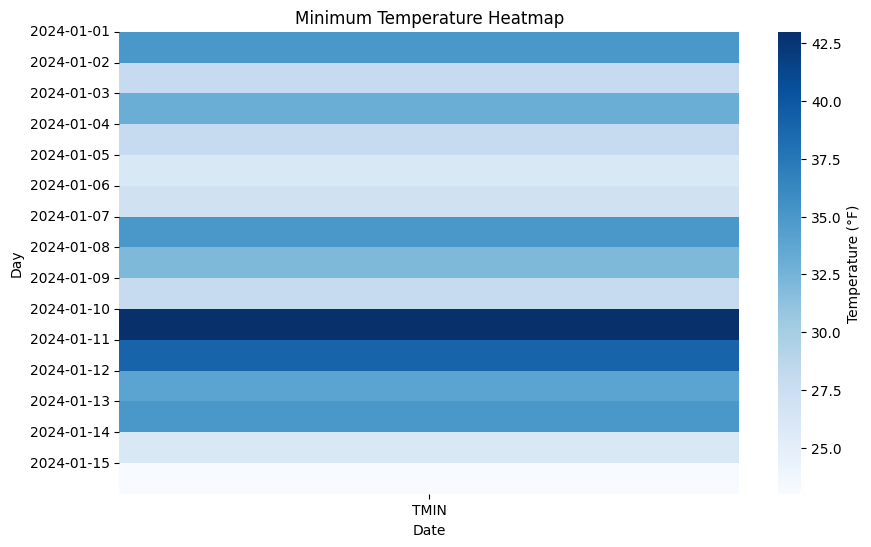

In [152]:
import seaborn as sns

def visualize_weather_data(data):
    start_date_input = input("Enter the start date in YYYY-MM-DD format: ")
    end_date_input = input("Enter the end date in YYYY-MM-DD format: ")

    start_date = pd.to_datetime(start_date_input)
    end_date = pd.to_datetime(end_date_input)

    filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]

    # Plot precipitation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_data[['PRCP']], cmap='Blues', cbar_kws={'label': 'Precipitation (inches)'})
    plt.title('Precipitation Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Day')
    plt.yticks(ticks=range(len(filtered_data)), labels=filtered_data['DATE'].dt.date)
    plt.show()

    # Plot snowfall heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_data[['SNOW']], cmap='Blues', cbar_kws={'label': 'Snowfall (inches)'})
    plt.title('Snowfall Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Day')
    plt.yticks(ticks=range(len(filtered_data)), labels=filtered_data['DATE'].dt.date)
    plt.show()

    # Plot snow depth heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_data[['SNWD']], cmap='Blues', cbar_kws={'label': 'Snow Depth (inches)'})
    plt.title('Snow Depth Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Day')
    plt.yticks(ticks=range(len(filtered_data)), labels=filtered_data['DATE'].dt.date)
    plt.show()

    # Plot maximum temperature heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_data[['TMAX']], cmap='Reds', cbar_kws={'label': 'Temperature (°F)'})
    plt.title('Maximum Temperature Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Day')
    plt.yticks(ticks=range(len(filtered_data)), labels=filtered_data['DATE'].dt.date)
    plt.show()

    # Plot minimum temperature heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(filtered_data[['TMIN']], cmap='Blues', cbar_kws={'label': 'Temperature (°F)'})
    plt.title('Minimum Temperature Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Day')
    plt.yticks(ticks=range(len(filtered_data)), labels=filtered_data['DATE'].dt.date)
    plt.show()


visualize_weather_data(weather_data)


In [153]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from datetime import datetime

weather_data = pd.read_csv('weather.csv')
weather_data.dropna(subset=['TMAX'], inplace=True)
X = weather_data[['PRCP', 'SNOW', 'SNWD', 'TMIN']]
y = weather_data['TMAX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

def predict_max_temperature(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    features = [0, 0, 0, 0]
    prediction = model.predict([features])
    return prediction[0]

input_date = input("Enter a future date (YYYY-MM-DD): ")
predicted_temperature = predict_max_temperature(input_date)
print(f"Predicted maximum temperature for {input_date}: {predicted_temperature:.2f} °C")

Predicted maximum temperature for 2024-05-30: 14.44 °C
